# Data processing

In [ ]:
!pip install yfinance pandas matplotlib -q

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
# --- End date: 11/10/2025 ---
end_date = datetime(2025, 10, 11)

# --- Start date: go back 10 years ---
start_date = end_date - timedelta(days=365 * 10)

# List of VN30 tickers
tickers = [
    "JPM",  # JPMorgan Chase
    "BAC",  # Bank of America
    "WFC",  # Wells Fargo
    "C",    # Citigroup
    "GS",   # Goldman Sachs
    "MS",   # Morgan Stanley
    "USB",  # U.S. Bancorp
    "PNC",  # PNC Financial Services
    "TFC",  # Truist Financial
    "COF"   # Capital One
]

# Load data from Yahoo Finance
tickers_yf = [t + ".VN" for t in tickers]
data = yf.download(tickers, start=start_date, end=end_date)['Close']
data

/tmp/ipython-input-2806693158.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  10 of 10 completed


Ticker,BAC,C,COF,GS,JPM,MS,PNC,TFC,USB,WFC
Date,,,,,,,,,,
2015-10-14,12.591781,37.852196,60.258038,145.794861,45.772923,24.400122,62.419838,23.770454,28.303211,38.567562
2015-10-15,13.034584,39.531357,61.885715,150.221252,47.222630,25.202459,63.158447,24.508507,28.659626,39.458729
2015-10-16,12.978228,39.322388,62.010323,150.399933,47.634663,25.457413,63.440861,24.262487,28.491903,39.601032
2015-10-19,12.994333,39.449261,61.985382,150.854813,47.474438,24.235151,62.789139,24.102905,28.463949,39.361393
2015-10-20,13.042640,39.434334,61.935593,150.667969,47.703331,24.182673,63.737770,24.435366,28.827353,39.750820
...,...,...,...,...,...,...,...,...,...,...
2025-10-06,50.389999,97.468849,213.039780,792.849487,309.179993,157.133377,193.840881,44.810001,47.720001,80.267982
2025-10-07,50.290001,97.220337,212.880386,785.754639,307.690002,155.026215,192.047333,44.681492,47.500000,80.715630
2025-10-08,49.840000,96.126846,211.117081,772.679443,304.029999,154.708145,188.430542,43.633648,46.990002,79.313004


Clean data (Detact Data)

In [ ]:
import pandas as pd
import numpy as np

df = data.copy()

print("\n=== 1. INFO ===")
print(df.info())

print("\n=== 2. Missing Values per Ticker ===")
print(df.isna().sum())

missing_days = df[df.isna().any(axis=1)]
print("\n=== 3. Days with ANY Missing Values ===")
print(missing_days)

# -----------------------------
# 4. Negative or zero prices
# -----------------------------
bad_prices = df[(df <= 0).any(axis=1)]
print("\n=== 4. Negative or Zero Prices ===")
print(bad_prices)

# -----------------------------
# 5. Outlier jumps > 20%
# -----------------------------
returns = df.pct_change()
jump_rows = returns[returns.abs() > 0.20]
print("\n=== 5. Extreme Daily Jumps > 20% ===")
print(jump_rows.dropna(how="all"))

# -----------------------------
# 6. Z-score outliers (6σ)
# -----------------------------
z = (df - df.mean()) / df.std()
z_outliers = z.abs() > 6
print("\n=== 6. Z-score Outliers (> 6σ) ===")
print(df[z_outliers].dropna(how="all"))

# -----------------------------
# 7. Missing day
# -----------------------------
valid_count = df.notna().sum(axis=1)
incomplete_days = df[valid_count < len(df.columns)]
print("\n=== 7. Days missing any ticker ===")
print(incomplete_days)

# -----------------------------
# 8. Summary
# -----------------------------
print("\n=== SUMMARY ===")
print(f"Missing days: {missing_days.shape[0]}")
print(f"Negative / zero price rows: {bad_prices.shape[0]}")
print(f"Extreme jump rows (>20%): {jump_rows.dropna(how='all').shape[0]}")
print(f"Z-score >6σ rows: {df[z_outliers].dropna(how='all').shape[0]}")
print(f"Incomplete days: {incomplete_days.shape[0]}")



=== 1. INFO ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2015-10-14 to 2025-10-10
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAC     2513 non-null   float64
 1   C       2513 non-null   float64
 2   COF     2513 non-null   float64
 3   GS      2513 non-null   float64
 4   JPM     2513 non-null   float64
 5   MS      2513 non-null   float64
 6   PNC     2513 non-null   float64
 7   TFC     2513 non-null   float64
 8   USB     2513 non-null   float64
 9   WFC     2513 non-null   float64
dtypes: float64(10)
memory usage: 216.0 KB
None

=== 2. Missing Values per Ticker ===
Ticker
BAC    0
C      0
COF    0
GS     0
JPM    0
MS     0
PNC    0
TFC    0
USB    0
WFC    0
dtype: int64

=== 3. Days with ANY Missing Values ===
Empty DataFrame
Columns: [BAC, C, COF, GS, JPM, MS, PNC, TFC, USB, WFC]
Index: []

=== 4. Negative or Zero Prices ===
Empty DataFrame
Columns: [BAC, C, COF, GS, JPM, MS, PNC, TF

Due to Covid Pandemic, March 16t become the worst one-day drops since 1987, so not surprised that COF had a big jump down over 20%

=> Real event so no need to delete

# Clustering

In [ ]:
# Split data into train and backtest
n = len(data)
train_end_idx = int(n * 0.7)
valid_end_idx = int(n * 0.9)   # 70% + 20%

train_data = data.iloc[:train_end_idx]
valid_data = data.iloc[train_end_idx:valid_end_idx]
test_data  = data.iloc[valid_end_idx:]


print("Total samples:", n)
print("Train:", train_data.shape)
print("Valid:", valid_data.shape)
print("Test:",  test_data.shape)

print("\nTrain:", train_data.index[0], "→", train_data.index[-1])
print("Valid:", valid_data.index[0], "→", valid_data.index[-1])
print("Test:",  test_data.index[0],  "→", test_data.index[-1])

Total samples: 2513
Train: (1759, 10)
Valid: (502, 10)
Test: (252, 10)

Train: 2015-10-14 00:00:00 → 2022-10-07 00:00:00
Valid: 2022-10-10 00:00:00 → 2024-10-08 00:00:00
Test: 2024-10-09 00:00:00 → 2025-10-10 00:00:00


In [ ]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Drop NaN columns (in case some tickers have missing prices)
train_clean = train_data.dropna(axis=1)

# Convert to 3D format: (samples, timesteps, 1)
ts_data = train_clean.values.T[:, :, None]

# Normalize (z-score for each individual ticker)
scaler = TimeSeriesScalerMeanVariance()
ts_scaled = scaler.fit_transform(ts_data)


In [ ]:
from tslearn.clustering import TimeSeriesKMeans

n_clusters = 4

model = TimeSeriesKMeans(
    n_clusters=n_clusters,
    metric="dtw",
    random_state=0
)

labels = model.fit_predict(ts_scaled)

In [ ]:
result = pd.DataFrame({
    "Ticker": train_clean.columns,
    "Cluster": labels
}).sort_values("Cluster")

result


,Ticker,Cluster
3,GS,0
5,MS,0
9,WFC,1
2,COF,2
6,PNC,2
4,JPM,2
7,TFC,2
0,BAC,2
8,USB,2
1,C,3


# Choose number of k-clusters

In [ ]:
from sklearn.metrics import silhouette_score

K_range = range(2, 10)
sil_scores = []

for k in K_range:
    model = TimeSeriesKMeans(n_clusters=k, metric="dtw", random_state=0)
    labels = model.fit_predict(ts_scaled)

    # silhouette dùng Euclidean trên centroid approximation (tslearn không có precomputed distance)
    sil = silhouette_score(ts_scaled.reshape(ts_scaled.shape[0], -1), labels)
    sil_scores.append(sil)


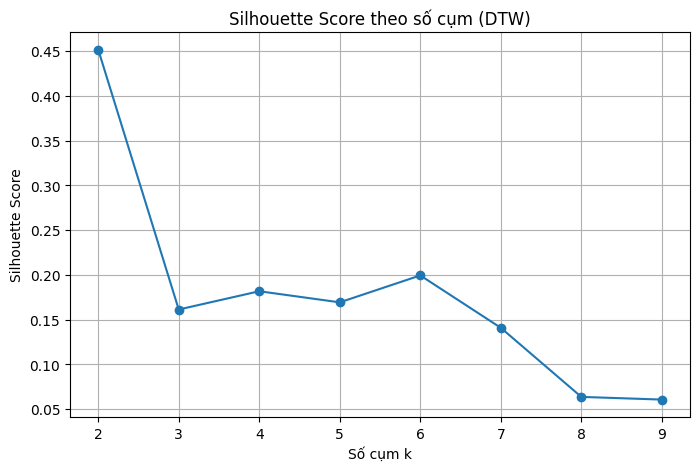

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(K_range), sil_scores, marker='o')
plt.title("Silhouette Score theo số cụm (DTW)")
plt.xlabel("Số cụm k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [ ]:
best_k = K_range[np.argmax(sil_scores)]
print("Số cụm tối ưu theo Silhouette:", best_k)


Số cụm tối ưu theo Silhouette: 2


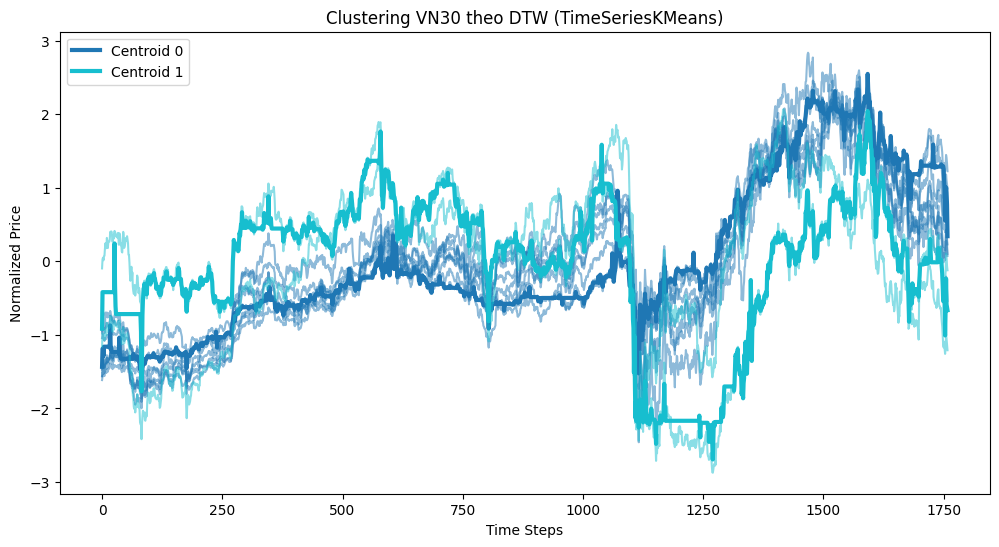

In [ ]:
# Cluster cuối cùng với số cụm tối ưu
model = TimeSeriesKMeans(n_clusters=best_k, metric="dtw", random_state=0)
labels = model.fit_predict(ts_scaled)

# labels[i] = cluster của ticker thứ i

plt.figure(figsize=(12,6))

colors = plt.cm.tab10(np.linspace(0, 1, best_k))

for k in range(best_k):
    for i, lbl in enumerate(labels):
        if lbl == k:
            plt.plot(ts_scaled[i].ravel(), color=colors[k], alpha=0.5)
    # Vẽ centroid của cluster
    plt.plot(model.cluster_centers_[k].ravel(), color=colors[k], linewidth=3, label=f'Centroid {k}')

plt.title("Clustering VN30 theo DTW (TimeSeriesKMeans)")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()


# Pair-Trading

In [ ]:
n_clusters = 2

model = TimeSeriesKMeans(
    n_clusters=n_clusters,
    metric="dtw",
    random_state=0
)

labels = model.fit_predict(ts_scaled)

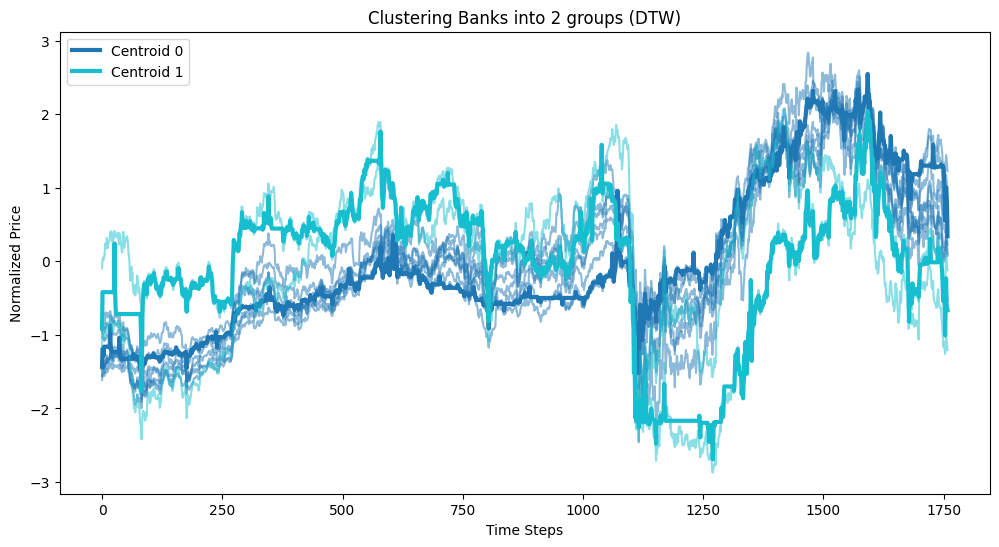

In [ ]:
plt.figure(figsize=(12, 6))

colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))  # 2 different colors

for k in range(n_clusters):
    # Plot all series in the cluster
    for i, lbl in enumerate(labels):
        if lbl == k:
            plt.plot(ts_scaled[i].ravel(), color=colors[k], alpha=0.5)
    # Plot the cluster centroid
    plt.plot(model.cluster_centers_[k].ravel(), color=colors[k], linewidth=3, label=f'Centroid {k}')

plt.title(f"Clustering Banks into {n_clusters} groups (DTW)")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()


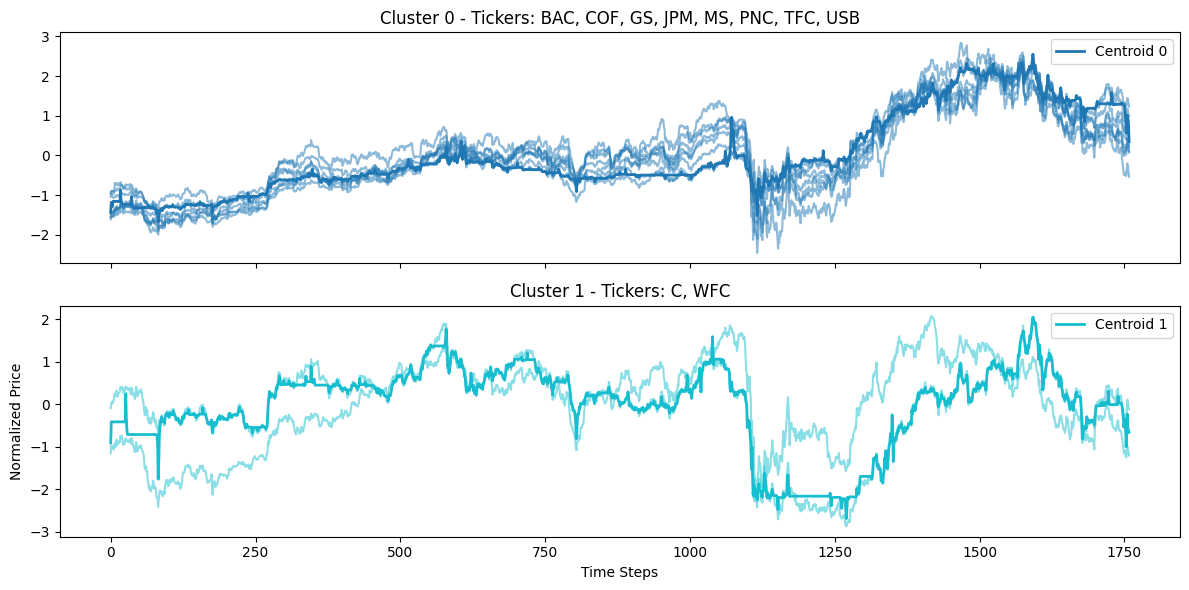

In [ ]:
tickers = train_clean.columns

fig, axes = plt.subplots(n_clusters, 1, figsize=(12, 3*n_clusters), sharex=True)

for k in range(n_clusters):
    ax = axes[k]

    # Get tickers that belong to cluster k
    idx_in_cluster = [i for i, lbl in enumerate(labels) if lbl == k]
    tickers_in_cluster = [tickers[i] for i in idx_in_cluster]

    # Plot all series in the cluster
    for i in idx_in_cluster:
        ax.plot(ts_scaled[i].ravel(), color=colors[k], alpha=0.5)

    # Plot the centroid
    ax.plot(model.cluster_centers_[k].ravel(), color=colors[k], linewidth=2, label=f'Centroid {k}')

    # Display the tickers in this cluster
    ax.set_title(f'Cluster {k} - Tickers: {", ".join(tickers_in_cluster)}')
    ax.legend()

plt.xlabel("Time Steps")
plt.ylabel("Normalized Price")
plt.tight_layout()
plt.show()


Find pair

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS
import itertools

In [ ]:
def find_cointegrated_pairs(df, tickers_in_cluster, adf_threshold=0.05):
    """
    df: price DataFrame
    tickers_in_cluster: list of tickers inside the cluster
    adf_threshold: p-value threshold for ADF stationary test
    """
    pairs = []

    # All combinations inside cluster
    for t1, t2 in itertools.combinations(tickers_in_cluster, 2):
        y1 = df[t1]
        y2 = df[t2]

        # Regression y1 ~ y2
        model = OLS(y1, np.vstack([np.ones(len(y2)), y2]).T).fit()
        beta = model.params[1]

        # Spread
        spread = y1 - beta * y2

        # ADF test
        pvalue = adfuller(spread)[1]

        if pvalue < adf_threshold:
            pairs.append({
                "pair": (t1, t2),
                "beta": beta,
                "adf_pval": pvalue
            })

    return pairs


In [ ]:
cluster_pairs = {}

for k in range(n_clusters):
    tickers_in_cluster = result[result['Cluster']==k]['Ticker'].tolist()
    pairs = find_cointegrated_pairs(train_clean, tickers_in_cluster)
    cluster_pairs[k] = pairs

for k, pairs in cluster_pairs.items():
    print(f"\nCluster {k} - number of pairs found: {len(pairs)}")
    for item in pairs:
        t1, t2 = item["pair"]
        p = float(item["adf_pval"])  # đảm bảo p là float
        print(f"{t1} & {t2} -> ADF p-value: {p:.9f}")




Cluster 0 - number of pairs found: 1
GS & MS -> ADF p-value: 0.029454395

Cluster 1 - number of pairs found: 0


/tmp/ipython-input-1365694255.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


Backtest

Với mỗi pair:

Lấy giá VALID

Tính spread = y1 – β·y2

Tính Z-score của spread

Thử nhiều threshold mở lệnh

Backtest trên VALID

Chọn threshold cho lợi nhuận / Sharpe tốt nhất

In [ ]:
def backtest_threshold(spread, zscore, entry, exit_z=0):
    position = 0
    pnl_list = []

    for i in range(1, len(spread)):

        # ENTRY
        if position == 0:
            if zscore[i] > entry:
                position = -1
            elif zscore[i] < -entry:
                position = 1

        # EXIT
        else:
            if abs(zscore[i]) < exit_z:
                position = 0

        # PnL must use previous position (position of i-1)
        pnl_today = position * (spread[i] - spread[i-1])
        pnl_list.append(pnl_today)

    cum_pnl = np.cumsum(pnl_list)
    return cum_pnl[-1] if len(cum_pnl) > 0 else 0


In [ ]:
def find_best_threshold_for_pairs(cluster_pairs, train_clean, valid_clean):
    best_thresholds = {}

    threshold_list = [1.0, 1.5, 2.0, 2.5]

    for cluster, pairs in cluster_pairs.items():
        best_thresholds[cluster] = {}

        for item in pairs:
            t1, t2 = item["pair"]
            beta = item["beta"]

            # Spread VALID
            y1 = valid_clean[t1]
            y2 = valid_clean[t2]
            spread = y1 - beta * y2

            # Z-score VALID
            z = (spread - spread.mean()) / spread.std()

            # Test thresholds
            results = []
            for th in threshold_list:
                pnl = backtest_threshold(spread.values, z.values, entry=th)
                results.append((th, pnl))

            # Select best threshold
            best_th, best_pnl = max(results, key=lambda x: x[1])

            best_thresholds[cluster][(t1, t2)] = {
                "best_threshold": best_th,
                "valid_pnl": best_pnl
            }

    return best_thresholds


In [ ]:
train_clean = train_data.dropna(axis=1)
valid_clean = valid_data.dropna(axis=1)

In [ ]:
best_thresholds = find_best_threshold_for_pairs(cluster_pairs, train_clean, valid_clean)

In [ ]:
best_thresholds

{0: {('GS', 'MS'): {'best_threshold': 1.0,
   'valid_pnl': np.float64(99.53312097432936)}},
 1: {}}

In [ ]:
def backtest_pair_test(y1, y2, beta, entry_threshold=1, exit_threshold=0):
    """
    y1, y2: Series test
    beta: slope từ train
    entry_threshold, exit_threshold: z-score thresholds
    """
    spread = y1 - beta*y2
    zscore = (spread - spread.mean()) / spread.std()

    long_signal = zscore < -entry_threshold
    short_signal = zscore > entry_threshold
    exit_signal = np.abs(zscore) < exit_threshold

    position = np.zeros(len(spread))

    for t in range(1, len(spread)):
        if long_signal[t]:
            position[t] = 1
        elif short_signal[t]:
            position[t] = -1
        elif exit_signal[t]:
            position[t] = 0
        else:
            position[t] = position[t-1]

    pnl = position[:-1] * ((y1[1:].values - y1[:-1].values) - beta*(y2[1:].values - y2[:-1].values))
    cum_pnl = np.cumsum(pnl)

    return cum_pnl, zscore, position


In [ ]:
summary = []

for k, pairs in cluster_pairs.items():
    for item in pairs:
        t1, t2 = item["pair"]
        beta = item["beta"]

        # Skip if missing in test dataset
        if t1 not in test_data.columns or t2 not in test_data.columns:
            continue

        y1 = test_data[t1]
        y2 = test_data[t2]

        cum_pnl, zscore, position = backtest_pair_test(y1, y2, beta)

        summary.append({
            "Cluster": k,
            "Pair": f"{t1}-{t2}",
            "Final_cum_PnL": cum_pnl[-1],
            "Beta": beta,
            "ADF_pval": item["adf_pval"]
        })

summary_df = pd.DataFrame(summary).sort_values("Final_cum_PnL", ascending=False)
summary_df


/tmp/ipython-input-1575330346.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if long_signal[t]:
/tmp/ipython-input-1575330346.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif short_signal[t]:
/tmp/ipython-input-1575330346.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif exit_signal[t]:


,Cluster,Pair,Final_cum_PnL,Beta,ADF_pval
0,0,GS-MS,75.913811,3.21065,0.029454


/tmp/ipython-input-1575330346.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if long_signal[t]:
/tmp/ipython-input-1575330346.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif short_signal[t]:
/tmp/ipython-input-1575330346.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif exit_signal[t]:


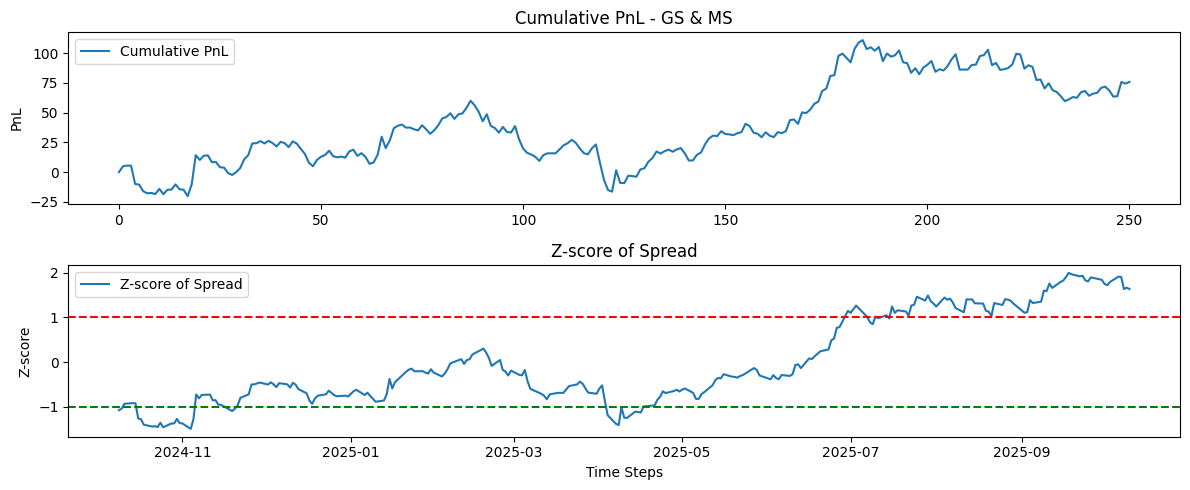

In [ ]:
import matplotlib.pyplot as plt

example = summary_df.iloc[0]["Pair"].split("-")
t1, t2 = example
beta = summary_df.iloc[0]["Beta"]

cum_pnl, zscore, position = backtest_pair_test(test_data[t1], test_data[t2], beta)

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(cum_pnl, label="Cumulative PnL")
plt.title(f"Cumulative PnL - {t1} & {t2}")
plt.ylabel("PnL")
plt.legend()

plt.subplot(2,1,2)
plt.plot(zscore, label="Z-score of Spread")
plt.axhline(1, color='r', linestyle='--')
plt.axhline(-1, color='g', linestyle='--')
plt.title("Z-score of Spread")
plt.xlabel("Time Steps")
plt.ylabel("Z-score")
plt.legend()
plt.tight_layout()
plt.show()
